<a href="https://colab.research.google.com/github/MohsenSadeghi/ml_course/blob/main/notebooks/notebook_1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
print(f"Is cuda available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
print(f"PyTorch version: {torch.__version__}")

print(f"Cuda device name: {torch.cuda.get_device_name(0)}")

Is cuda available: True
CUDA version: 11.3
PyTorch version: 1.12.1+cu113
Cuda device name: Tesla T4


In [3]:
cuda0 = torch.device('cuda:0')
cpu0 = torch.device('cpu:0')

In [66]:
n_data_points = 100

x = torch.linspace(0.0, 1.0, n_data_points, device=cuda0)
noise_scale = 2.0

print(x)

tensor([0.0000, 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707, 0.0808,
        0.0909, 0.1010, 0.1111, 0.1212, 0.1313, 0.1414, 0.1515, 0.1616, 0.1717,
        0.1818, 0.1919, 0.2020, 0.2121, 0.2222, 0.2323, 0.2424, 0.2525, 0.2626,
        0.2727, 0.2828, 0.2929, 0.3030, 0.3131, 0.3232, 0.3333, 0.3434, 0.3535,
        0.3636, 0.3737, 0.3838, 0.3939, 0.4040, 0.4141, 0.4242, 0.4343, 0.4444,
        0.4545, 0.4646, 0.4747, 0.4848, 0.4949, 0.5051, 0.5152, 0.5253, 0.5354,
        0.5455, 0.5556, 0.5657, 0.5758, 0.5859, 0.5960, 0.6061, 0.6162, 0.6263,
        0.6364, 0.6465, 0.6566, 0.6667, 0.6768, 0.6869, 0.6970, 0.7071, 0.7172,
        0.7273, 0.7374, 0.7475, 0.7576, 0.7677, 0.7778, 0.7879, 0.7980, 0.8081,
        0.8182, 0.8283, 0.8384, 0.8485, 0.8586, 0.8687, 0.8788, 0.8889, 0.8990,
        0.9091, 0.9192, 0.9293, 0.9394, 0.9495, 0.9596, 0.9697, 0.9798, 0.9899,
        1.0000], device='cuda:0')


In [67]:
def target_function (x):

  return 10.0 * torch.cos (2.0 * np.pi * x - 0.3 * np.pi)

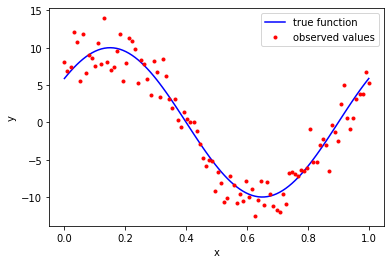

In [68]:
y_true = target_function (x)
y_observed = target_function(x) + torch.normal (size=(n_data_points, ),
                                                mean=0.0, std=noise_scale, device=cuda0)

plt.figure ()
plt.plot(x.to(cpu0), y_true.to(cpu0), 'b-', label="true function")
plt.plot(x.to(cpu0), y_observed.to(cpu0), 'r.', label="observed values")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [69]:
def model(params, x):

  result = torch.tensor([0.0], device=cuda0, requires_grad=True)

  for i, _p in enumerate(params):
    result = result + _p * x ** i

  return result

In [70]:
def loss_function (params, x):

  y_true = target_function (x)
  y_predicted = model (params, x)

  loss = torch.mean((y_predicted - y_true) ** 2)

  return loss

In [71]:
params = torch.tensor([1.0, -1.0], device=cuda0, requires_grad=True)

print(loss_function(params, x))

tensor(47.5732, device='cuda:0', grad_fn=<MeanBackward0>)


In [72]:
gradients = torch.autograd.grad(outputs=loss_function(params, x), inputs=params)
print(gradients)

(tensor([0.8824, 2.8198], device='cuda:0'),)


In [73]:
loss = loss_function(params, x)

loss.backward()

In [74]:
print(params.grad)

tensor([0.8824, 2.8198], device='cuda:0')


In [117]:
p0 = [10.0, -10.0, 5.0, -5.0, 1.0, 1.0]

params = torch.tensor(p0, device=cuda0, requires_grad=True)
learning_rate = torch.tensor([0.1], device=cuda0)

running_loss = []

for i in range(2000):
  
  loss = loss_function(params, x)
  loss.backward ()

  params.data = params.data - learning_rate * params.grad.data
  params.grad.data.zero_()

  loss_value = loss.item()
  
  running_loss.append(loss_value)
  
  if i % 100 == 0:
    print(f"iteration: {i} --- current loss value = {loss_value: .2f}")


iteration: 0 --- current loss value =  67.17
iteration: 100 --- current loss value =  19.59
iteration: 200 --- current loss value =  13.03
iteration: 300 --- current loss value =  9.67
iteration: 400 --- current loss value =  7.94
iteration: 500 --- current loss value =  7.04
iteration: 600 --- current loss value =  6.56
iteration: 700 --- current loss value =  6.29
iteration: 800 --- current loss value =  6.13
iteration: 900 --- current loss value =  6.03
iteration: 1000 --- current loss value =  5.96
iteration: 1100 --- current loss value =  5.90
iteration: 1200 --- current loss value =  5.85
iteration: 1300 --- current loss value =  5.81
iteration: 1400 --- current loss value =  5.76
iteration: 1500 --- current loss value =  5.72
iteration: 1600 --- current loss value =  5.68
iteration: 1700 --- current loss value =  5.65
iteration: 1800 --- current loss value =  5.61
iteration: 1900 --- current loss value =  5.57


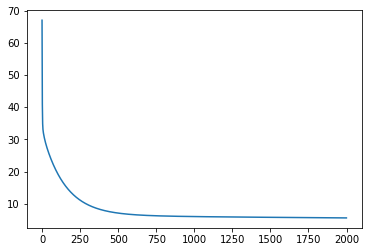

In [118]:
plt.figure()
plt.plot(running_loss)

In [119]:
def display_prediction (params):
  y_predicted = model(params.data, x).clone().detach()

  plt.figure ()
  plt.plot(x.to(cpu0), y_true.to(cpu0), 'b-', label="true function")
  plt.plot(x.to(cpu0), y_observed.to(cpu0), 'r.', label="observed values")
  plt.plot(x.to(cpu0), y_predicted.to(cpu0), 'g-', label="predicted function")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

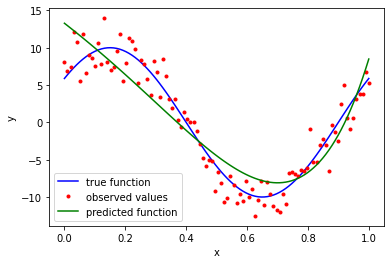

In [120]:
display_prediction (params)

In [121]:
params = torch.tensor(p0, device=cuda0, requires_grad=True)

learning_rate = 0.1

optimizer = torch.optim.Adam([{'params': params}], lr=learning_rate)

running_loss = []

for i in range(2000):
  
  optimizer.zero_grad()
  
  loss = loss_function(params, x)
  loss.backward()
  
  optimizer.step()
  
  loss_value = loss.item()
  
  running_loss.append(loss_value)
  
  if i % 100 == 0:
    print(f"iteration: {i} --- current loss value = {loss_value: .2f}")

iteration: 0 --- current loss value =  67.17
iteration: 100 --- current loss value =  23.00
iteration: 200 --- current loss value =  15.34
iteration: 300 --- current loss value =  10.19
iteration: 400 --- current loss value =  7.38
iteration: 500 --- current loss value =  6.06
iteration: 600 --- current loss value =  5.52
iteration: 700 --- current loss value =  5.30
iteration: 800 --- current loss value =  5.19
iteration: 900 --- current loss value =  5.12
iteration: 1000 --- current loss value =  5.06
iteration: 1100 --- current loss value =  4.99
iteration: 1200 --- current loss value =  4.93
iteration: 1300 --- current loss value =  4.87
iteration: 1400 --- current loss value =  4.81
iteration: 1500 --- current loss value =  4.75
iteration: 1600 --- current loss value =  4.69
iteration: 1700 --- current loss value =  4.63
iteration: 1800 --- current loss value =  4.58
iteration: 1900 --- current loss value =  4.53


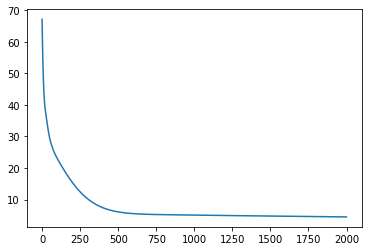

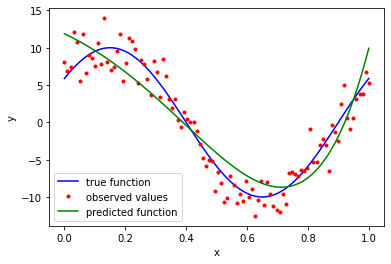

In [122]:
plt.figure()
plt.plot(running_loss)

display_prediction (params)